In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [69]:
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [13]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

In [14]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
iris["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [65]:
iris.groupby("class")["sepal_width"].sum()

class
Iris-setosa        170.9
Iris-versicolor    138.5
Iris-virginica     148.7
Name: sepal_width, dtype: float64

In [66]:
iris["color"] = iris["class"].replace({"Iris-setosa": 1, "Iris-versicolor": 2, "Iris-virginica": 3})

In [67]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class,color
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


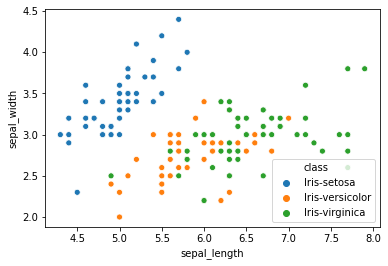

In [70]:
sns.scatterplot(iris["sepal_length"], iris["sepal_width"], hue = iris["class"])

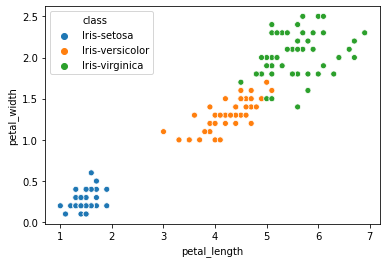

In [82]:
sns.scatterplot(iris["petal_length"], iris["petal_width"], hue = iris["class"])

In [83]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
color             int64
dtype: object

In [92]:
def MinMaxScaler(df):
    for i in df:
        if df[i].dtype != "object":
            if df[i].min() != df[i].max():
                df[i] = (df[i] - df[i].min())/(df[i].max() - df[i].min())
    return df

In [93]:
iris = MinMaxScaler(iris)

In [94]:
iris

,sepal_length,sepal_width,petal_length,petal_width,class,color
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa,0.0
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa,0.0
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa,0.0
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa,0.0
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa,0.0
...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,Iris-virginica,1.0
146,0.555556,0.208333,0.677966,0.750000,Iris-virginica,1.0
147,0.611111,0.416667,0.711864,0.791667,Iris-virginica,1.0
148,0.527778,0.583333,0.745763,0.916667,Iris-virginica,1.0


In [95]:
del iris["color"]

In [106]:
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,Iris-virginica
146,0.555556,0.208333,0.677966,0.750000,Iris-virginica
147,0.611111,0.416667,0.711864,0.791667,Iris-virginica
148,0.527778,0.583333,0.745763,0.916667,Iris-virginica


In [99]:
iris["class"].str.get_dummies()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [108]:
iris = pd.concat([iris, iris["class"].str.get_dummies()], axis = 1)
iris

,sepal_length,sepal_width,petal_length,petal_width,class,Iris-setosa,Iris-versicolor,Iris-virginica
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa,1,0,0
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa,1,0,0
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa,1,0,0
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa,1,0,0
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa,1,0,0
...,...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,Iris-virginica,0,0,1
146,0.555556,0.208333,0.677966,0.750000,Iris-virginica,0,0,1
147,0.611111,0.416667,0.711864,0.791667,Iris-virginica,0,0,1
148,0.527778,0.583333,0.745763,0.916667,Iris-virginica,0,0,1


In [109]:
del iris["class"]

In [110]:
iris

,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
0,0.222222,0.625000,0.067797,0.041667,1,0,0
1,0.166667,0.416667,0.067797,0.041667,1,0,0
2,0.111111,0.500000,0.050847,0.041667,1,0,0
3,0.083333,0.458333,0.084746,0.041667,1,0,0
4,0.194444,0.666667,0.067797,0.041667,1,0,0
...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,0,0,1
146,0.555556,0.208333,0.677966,0.750000,0,0,1
147,0.611111,0.416667,0.711864,0.791667,0,0,1
148,0.527778,0.583333,0.745763,0.916667,0,0,1


In [111]:
from sklearn.model_selection import train_test_split

In [112]:
train_test_split?

In [113]:
features = iris.iloc[:, 0:4]
target = iris.iloc[:, 4:]

In [114]:
features

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [115]:
target

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [116]:
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [117]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
145,0.666667,0.416667,0.711864,0.916667
5,0.305556,0.791667,0.118644,0.125000
23,0.222222,0.541667,0.118644,0.166667
89,0.333333,0.208333,0.508475,0.500000
110,0.611111,0.500000,0.694915,0.791667
...,...,...,...,...
34,0.166667,0.458333,0.084746,0.000000
125,0.805556,0.500000,0.847458,0.708333
96,0.388889,0.375000,0.542373,0.500000
109,0.805556,0.666667,0.864407,1.000000


In [118]:
y_train

,Iris-setosa,Iris-versicolor,Iris-virginica
145,0,0,1
5,1,0,0
23,1,0,0
89,0,1,0
110,0,0,1
...,...,...,...
34,1,0,0
125,0,0,1
96,0,1,0
109,0,0,1


In [119]:
from sklearn.neighbors import KNeighborsClassifier

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [120]:
knnc = KNeighborsClassifier()

In [122]:
knnc.fit(X_train,y_train)

KNeighborsClassifier()

In [123]:
knnc.score(X_test, y_test)

0.9736842105263158